In [1]:
######################
## Import Libraries ##
######################
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import plotly.express as px
import sqlalchemy as sq

In [16]:
px.line()

['date', 'location']

In [27]:
location = [obj=='date' for obj in z]

In [15]:
for i,obj in enumerate(z):
    if obj == 'date':
        print(True,i)
    else:
        print(False)

True 0
False


In [10]:
df = pd.read_sql_table('covid_world',engine,parse_dates='date')

<AxesSubplot:xlabel='date'>

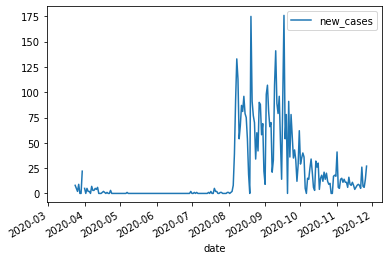

In [11]:
df[df['iso_code']=='ABW'].plot('date','new_cases')

In [13]:
df_corr = df[['new_cases_per_million','hosp_patients_per_million','location']]

In [23]:
### plt.scatter('new_cases_per_million','hosp_patients_per_million',new_df.dropna())

In [ ]:
df = df[(df['location']=='United States') | (df['location']=='Hungary') | (df['location']=='Jordan')]

d_mill = px.line(df,
              x='date',
              y='new_deaths_per_million',
              color='location',
              labels={
                  'date':'Date',
                  'new_deaths_per_million':'New deaths per million'
              }
             )

h_mill = px.line(df,
                 x='date',
                 y='hosp_patients_per_million',
                 color='location',
                 labels={
                     'date':'Date',
                     'hosp_patients_per_million':'Hospital patients per million'
                 }
                )

p_rate = px.line(df,
                 x='date',
                 y='positive_rate',
                 color='location',
                 labels={
                     'date':'Date',
                     'positive_rate':'Positivity Rate'
                 }
                )
compar = px.scatter(df,x='new_cases_per_million',
                    y='hosp_patients_per_million',
                    color='location')
def app():
    st.title('Covid Dash')
    options = ['Deaths per mill','Hosp patients per mill','Positivity rate','Comparison']
    selected = st.selectbox('Plots',options,index=2)

    if 'Deaths' in selected:
        st.plotly_chart(d_mill,use_container_width = False)
    if 'Hosp' in selected:
        st.plotly_chart(h_mill,use_container_width = False)
    if 'rate' in selected:
        st.plotly_chart(p_rate,use_container_width = False)
    if 'Compar' in selected:
        st.plotly_chart(compar, use_container_width = False)
        df_corr = df[['new_cases_per_million','hosp_patients_per_million','location']]
        df_corr = df_corr[df_corr['location'] != 'Jordan']
        corr = df_corr.groupby('location').corr()['hosp_patients_per_million']
        st.write(f'Correlation in Hungary: {round(corr.reset_index().iloc[0,2],2)}')
        st.write(f'Correlation in USA: {round(corr.reset_index().iloc[2,2],2)}')
    update = st.button('Update Database')
    if update == True:
        from apps import update_covid_db as ucd
        result = ucd.app()
        st.success(result)
        # projects/portfolio/apps/update_covid_db.py

